In [1]:
import matplotlib.pyplot as plt

In [2]:
int_8 = "./data/inference_time/Quantized_int8.txt"
fp_16 = "./data/inference_time/Quantized_float16.txt"
base_model = "./data/inference_time/BaseModelResnet50InferenceTime.txt"

import json
import statistics

# Open and load the JSON file
with open(int_8, 'r') as file:
    int_8_list = json.load(file)
print(int_8_list)

with open(fp_16, 'r') as file:
    fp_16_list = json.load(file)
print(fp_16_list)

with open(base_model, 'r') as file:
    base_model_list = json.load(file)
print(base_model_list)

print(statistics.mean(int_8_list)*1000)
print(statistics.mean(fp_16_list)*1000)
print(statistics.mean(base_model_list)*1000)

[0.009276032447814941, 0.011201977729797363, 0.012532949447631836, 0.011512041091918945, 0.011926054954528809, 0.011985063552856445, 0.013505935668945312, 0.014026045799255371, 0.01503598690032959, 0.014394998550415039, 0.008566975593566895, 0.00981593132019043, 0.007773041725158691, 0.007411003112792969, 0.00852501392364502, 0.007799983024597168, 0.008093953132629395, 0.007552981376647949, 0.007999062538146973, 0.002811908721923828, 0.0036219358444213867, 0.0033910274505615234, 0.0031740665435791016, 0.004115104675292969, 0.004463911056518555, 0.00527501106262207, 0.005092024803161621, 0.005859017372131348, 0.006114006042480469, 0.006620049476623535, 0.007296085357666016, 0.007321000099182129, 0.008350014686584473, 0.007902026176452637, 0.008307933807373047, 0.009154081344604492, 0.01010596752166748, 0.010262012481689453, 0.010969996452331543, 0.012001991271972656, 0.012487053871154785, 0.012282013893127441, 0.013639092445373535, 0.014725923538208008, 0.013386011123657227, 0.014089941

Average inference time:  0.0042626525769047414


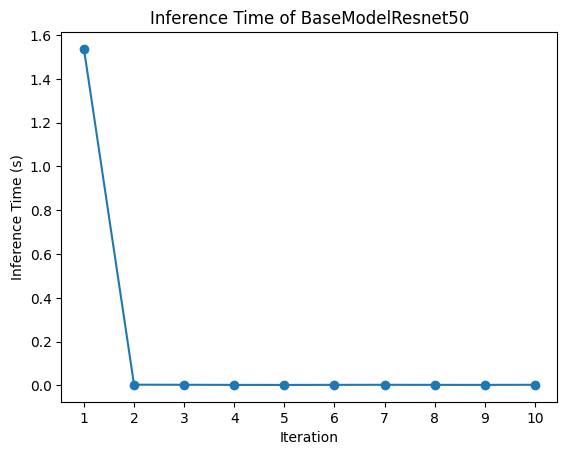

In [9]:
txt_path = "data\inference_time\BaseModelResnet50InferenceTime.txt"
with open(txt_path, "r") as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]

lines = lines[0]
lines = lines[1:-1].split(", ")
lines = [float(line) for line in lines]
# Get average inference time for each iteration
avg = sum(lines) / len(lines)
print("Average inference time: ", avg)
lines = lines[:10]

x = [i+1 for i in range(len(lines))]
y = [float(line) for line in lines]

# X is iteration, Y is inference time. Mark every iteration on the x axis.
plt.xlabel("Iteration")
plt.ylabel("Inference Time (s)")
plt.title("Inference Time of BaseModelResnet50")
plt.xticks(x)

plt.plot(x, y, marker='o')

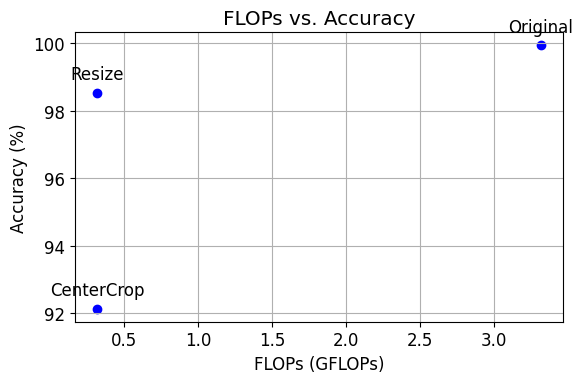

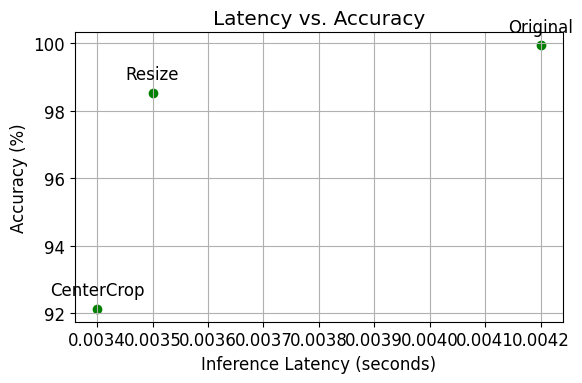

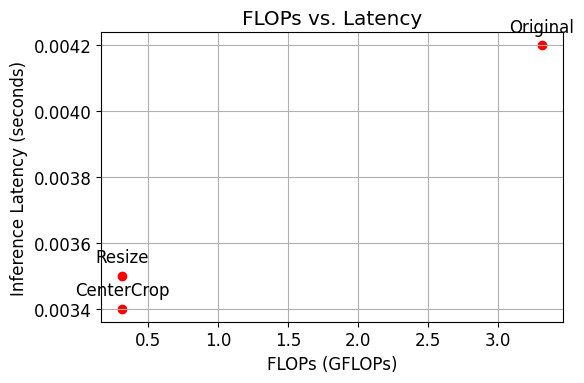

In [10]:
import matplotlib.pyplot as plt

# Data from the table
methods = ['Original', 'CenterCrop', 'Resize']
accuracy = [0.9994 * 100, 0.9213 * 100, 0.9852 * 100]  # Convert to percentage
flops = [3312770048, 314888192, 314888192]
latency = [0.0042, 0.0034, 0.0035]

# Convert FLOPs to GFLOPs for better readability
flops_giga = [x / 1e9 for x in flops]

# Set font sizes
plt.rcParams.update({'font.size': 10})  # Increase font size globally

# Plot 1: FLOPs vs. Accuracy
plt.figure(figsize=(6, 4))  # Make the image smaller
plt.scatter(flops_giga, accuracy, color='blue')
for i, method in enumerate(methods):
    plt.annotate(method, (flops_giga[i], accuracy[i]),
                 textcoords="offset points", xytext=(0, 10), ha='center')
plt.xlabel('FLOPs (GFLOPs)')
plt.ylabel('Accuracy (%)')
plt.title('FLOPs vs. Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Latency vs. Accuracy
plt.figure(figsize=(6, 4))  # Make the image smaller
plt.scatter(latency, accuracy, color='green')
for i, method in enumerate(methods):
    plt.annotate(method, (latency[i], accuracy[i]),
                 textcoords="offset points", xytext=(0, 10), ha='center')
plt.xlabel('Inference Latency (seconds)')
plt.ylabel('Accuracy (%)')
plt.title('Latency vs. Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: FLOPs vs. Latency
plt.figure(figsize=(6, 4))  # Make the image smaller
plt.scatter(flops_giga, latency, color='red')
for i, method in enumerate(methods):
    plt.annotate(method, (flops_giga[i], latency[i]),
                 textcoords="offset points", xytext=(0, 10), ha='center')
plt.xlabel('FLOPs (GFLOPs)')
plt.ylabel('Inference Latency (seconds)')
plt.title('FLOPs vs. Latency')
plt.grid(True)
plt.tight_layout()
plt.show()


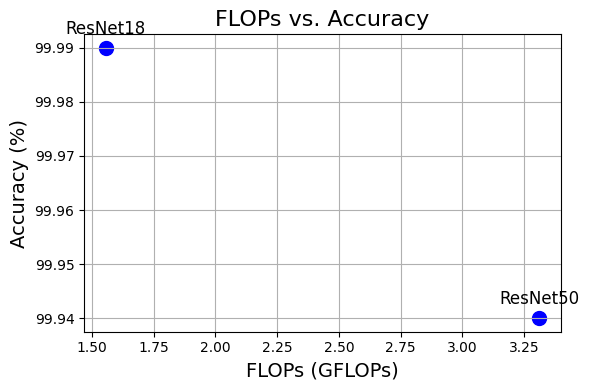

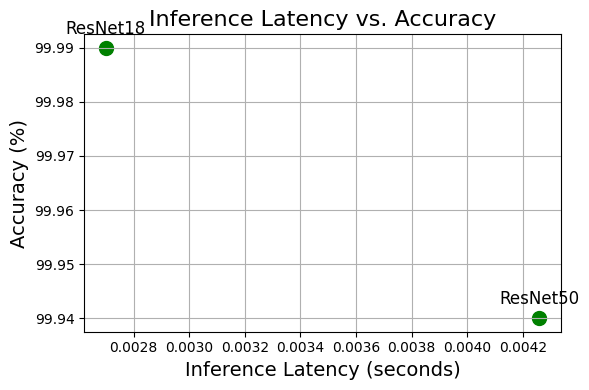

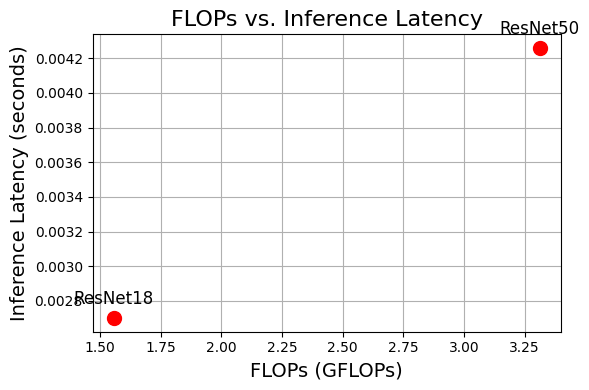

In [6]:
import matplotlib.pyplot as plt

# Data from your message
models = ['ResNet18', 'ResNet50']
flops = [1555890176, 3312770048]
latency = [0.0027,  0.00426]
accuracy = [0.9999 * 100, 0.9994 * 100]  # Convert to percentage

# Convert FLOPs to GFLOPs for better readability
flops_giga = [x / 1e9 for x in flops]
plt.rcParams.update({'font.size': 10})  # Increase font size globally

# Plot 1: FLOPs vs. Accuracy
plt.figure(figsize=(6, 4))
plt.scatter(flops_giga, accuracy, color='blue', s=100)
for i, model in enumerate(models):
    plt.annotate(model, (flops_giga[i], accuracy[i]),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12)
plt.xlabel('FLOPs (GFLOPs)', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('FLOPs vs. Accuracy', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Inference Latency vs. Accuracy
plt.figure(figsize=(6, 4))
plt.scatter(latency, accuracy, color='green', s=100)
for i, model in enumerate(models):
    plt.annotate(model, (latency[i], accuracy[i]),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12)
plt.xlabel('Inference Latency (seconds)', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('Inference Latency vs. Accuracy', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: FLOPs vs. Inference Latency
plt.figure(figsize=(6, 4))
plt.scatter(flops_giga, latency, color='red', s=100)
for i, model in enumerate(models):
    plt.annotate(model, (flops_giga[i], latency[i]),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12)
plt.xlabel('FLOPs (GFLOPs)', fontsize=14)
plt.ylabel('Inference Latency (seconds)', fontsize=14)
plt.title('FLOPs vs. Inference Latency', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()
